# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sean Andrianto
- **Email:** seanandrianto02@gmail.com
- **ID Dicoding:** se2004

## Menentukan Pertanyaan Bisnis

- Jumlah Penyewa sepeda tertinggi pada hari libur khusus
- Perbandingan antara penyewa casual dan registered

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

***memanggil dataset yang diperlukan***

In [144]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Terdapat 2 dataset with format csv
- Pada tahap ini, saya menggunakan 1 dataset, yaitu day_csv dikarenakan sesuai dengan pertanyaan bisnis yang saya buat

### Assessing Data

***Mencari informasi tentang dataset ini, seperti tipe data, jumlah***

In [145]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


***memanggil missing value dari dataset***

In [146]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

***memanggil fungsi describe untuk mencari nilai statistiknya***

In [147]:
day_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


***mencari data yang terduplikasi***

In [148]:
duplicate = day_df.duplicated().sum()
print("Jumlah yang terduplikasi :", duplicate)

Jumlah yang terduplikasi : 0


***membuat fungsi untuk mencari outlier***

In [149]:
def detect_numeric_outliers(dataframe):
    numeric_cols = dataframe.select_dtypes(include=[np.number]).columns
    outlier_dict = {}

    for col in numeric_cols:
        data = dataframe[col].dropna()
        q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        minimal, maximal = q25 - cut_off, q75 + cut_off

        outliers = dataframe[(dataframe[col] < minimal) | (dataframe[col] > maximal)]
        outlier_dict[col] = outliers

        plt.figure(figsize=(8, 4))
        plt.boxplot(data, vert=False)
        plt.title(f"Boxplot kolom '{col}'")
        plt.xlabel(col)
        plt.show()

    return outlier_dict

***memanggil fungsi untuk mencari outlier pada dataset dan menampilkan hasilnya dalam bentuk visualisasi***

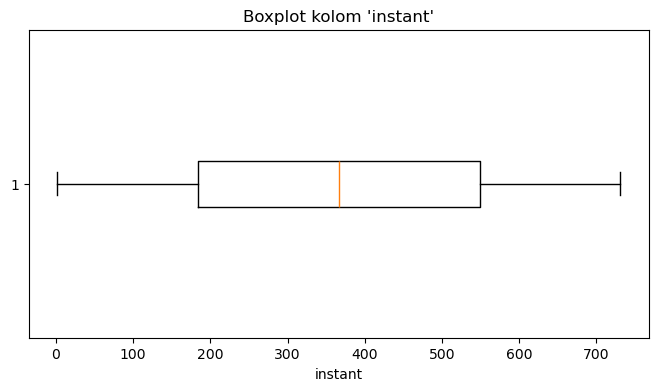

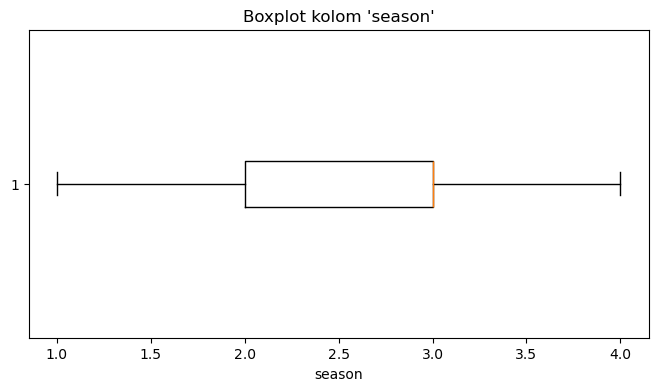

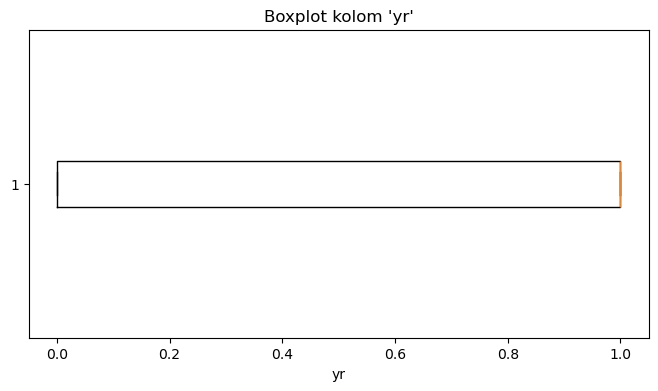

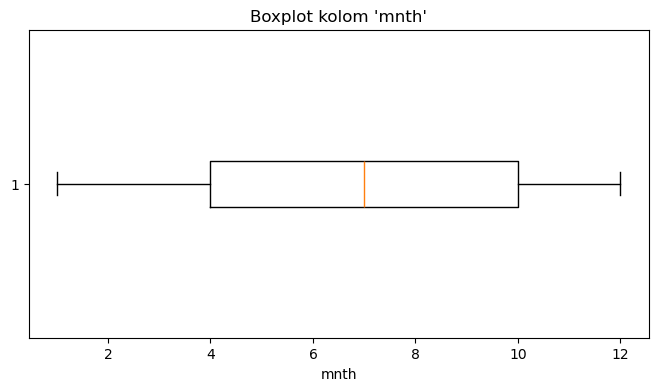

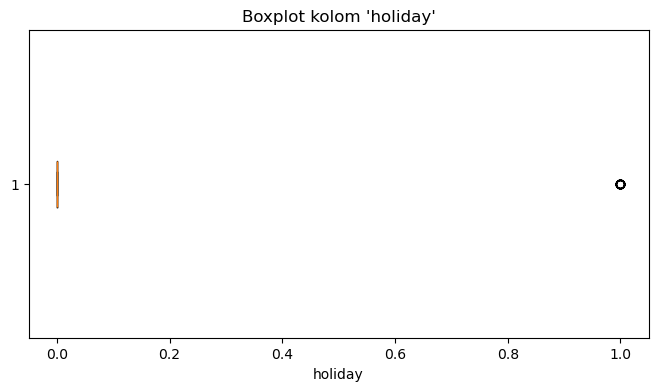

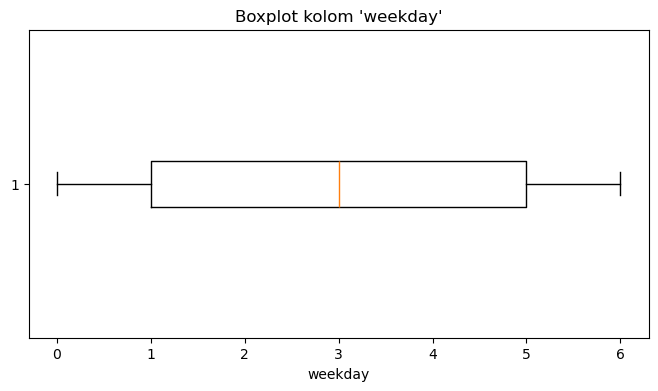

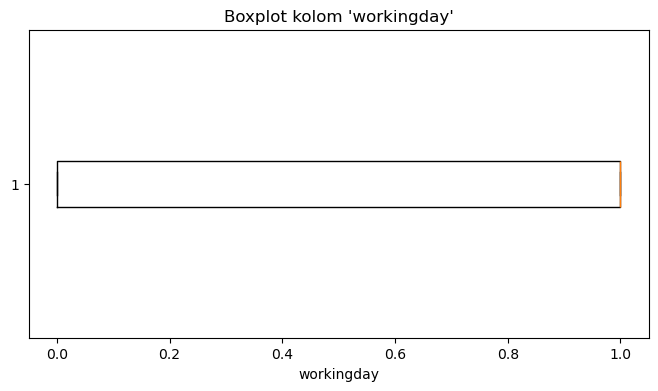

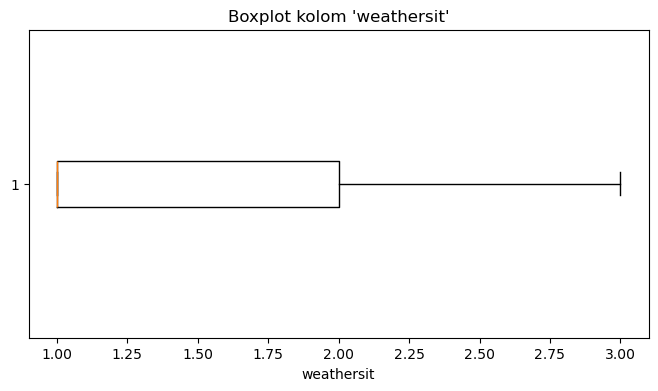

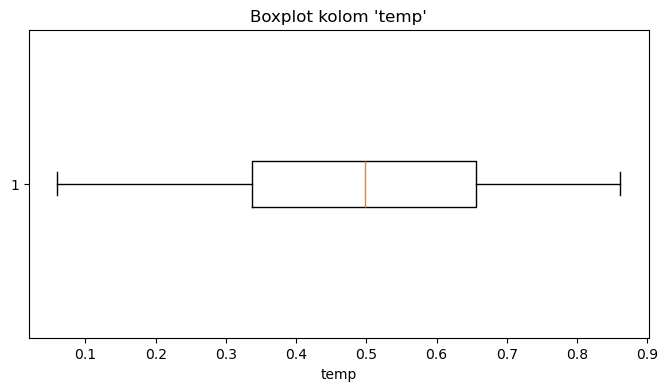

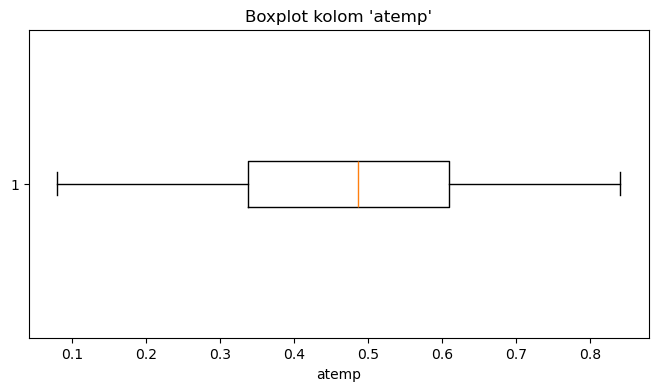

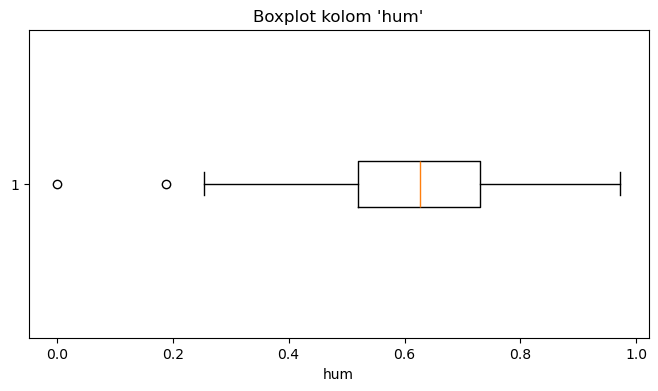

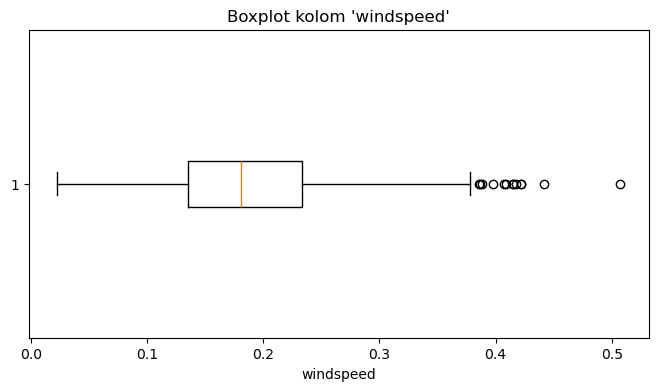

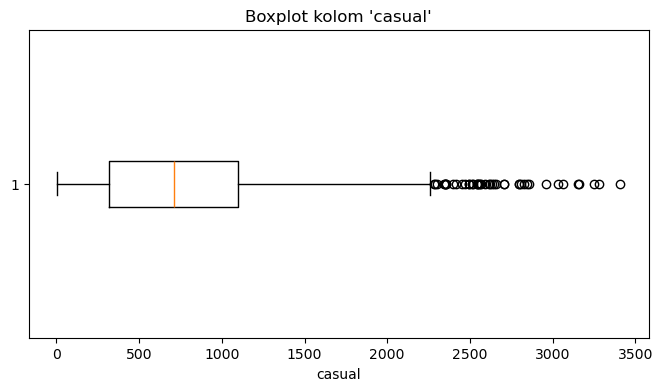

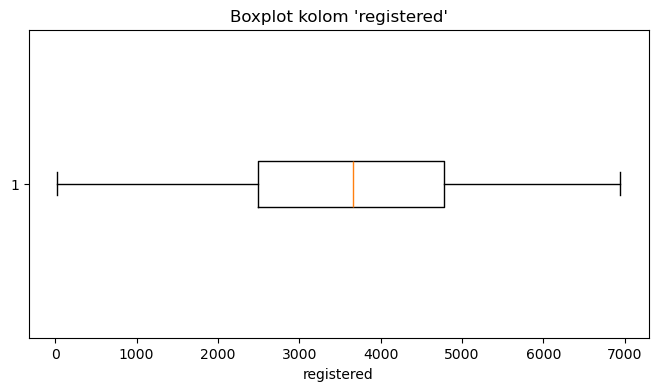

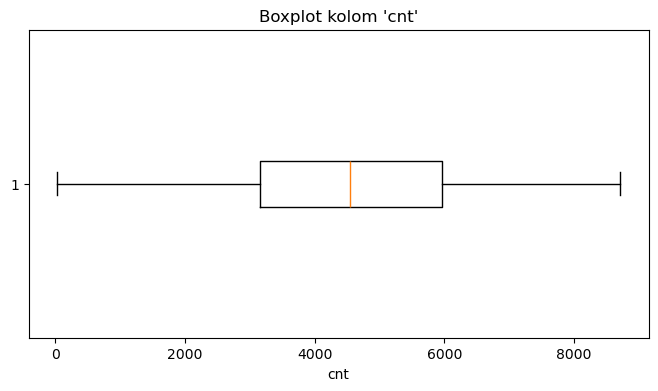

In [150]:
outlier_results = detect_numeric_outliers(day_df)

**Insight:**
- Dari step ini, didapatkan informasi bahwa data dari dataset sangat bersih, tanpa adanya missing value maupun duplicated data
- Permasalahan yang ada pada dataset ini adalah beberapa tipe data dari kolom dteday yang tidak sesuai
- Selain itu juga, terindikasi adanya Outlier pada kolom humidity,windspeed,casual

### Cleaning Data

***membersihkan outlier dengan metode IQR***

In [151]:
q25 = day_df['hum'].quantile(0.25)
q75 = day_df['hum'].quantile(0.75)
iqr = q75 - q25
minimal = q25 - 1.5 * iqr
maximal = q75 + 1.5 * iqr

median_val = day_df.loc[(day_df['hum'] >= minimal) & (day_df['hum'] <= maximal), 'hum'].median()
day_df['hum'] = day_df['hum'].apply(lambda x: median_val if x < minimal or x > maximal else x)

In [152]:
q25 = day_df['windspeed'].quantile(0.25)
q75 = day_df['windspeed'].quantile(0.75)
iqr = q75 - q25
minimal = q25 - 1.5 * iqr
maximal = q75 + 1.5 * iqr

median_val = day_df.loc[(day_df['windspeed'] >= minimal) & (day_df['windspeed'] <= maximal), 'windspeed'].median()
day_df['windspeed'] = day_df['windspeed'].apply(lambda x: median_val if x < minimal or x > maximal else x)

In [153]:
q25 = day_df['casual'].quantile(0.25)
q75 = day_df['casual'].quantile(0.75)
iqr = q75 - q25
minimal = q25 - 1.5 * iqr
maximal = q75 + 1.5 * iqr

day_df['casual'] = day_df['casual'].clip(minimal, maximal).astype(int)
day_df['cnt'] = (day_df['casual'] + day_df['registered']).astype(int)

***menampilkan hasil setelah melakukan imputasi dengan metode IQR menggunakan fungsi mencari outlier***

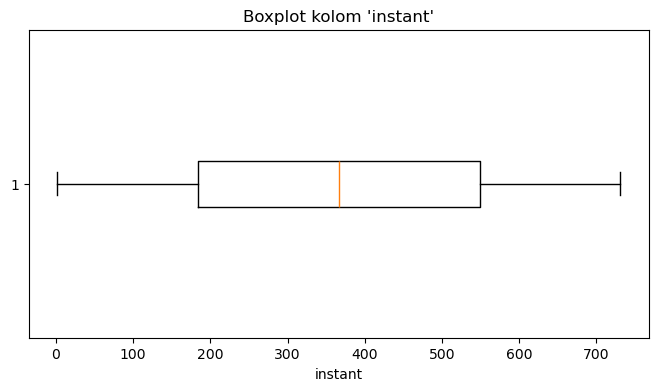

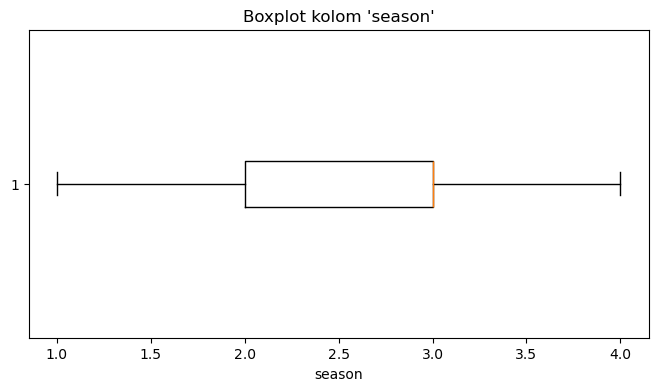

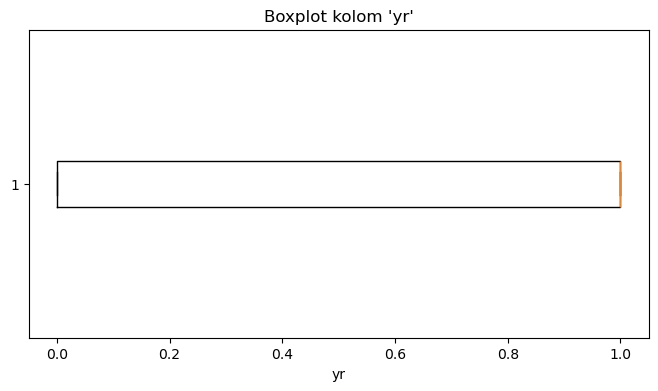

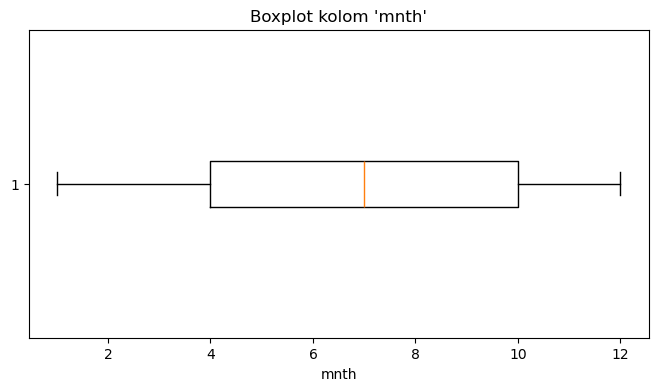

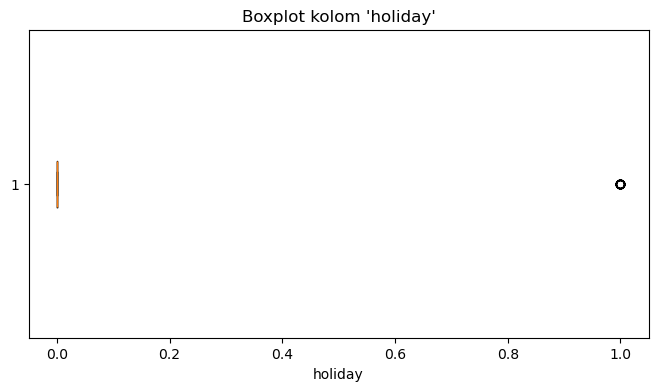

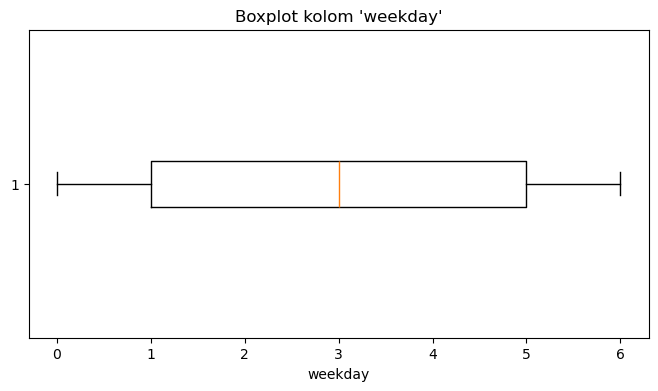

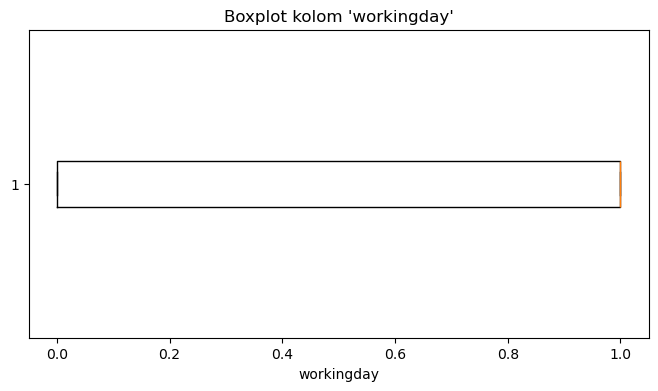

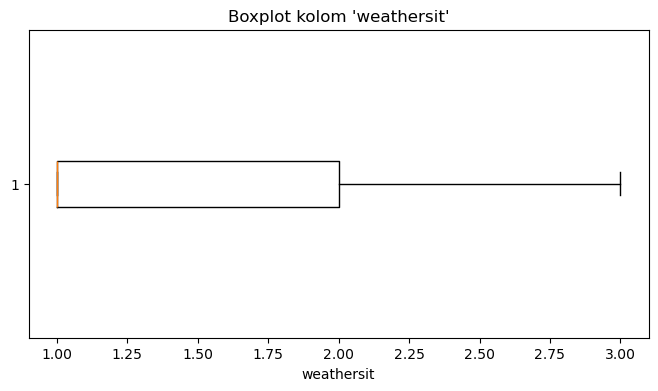

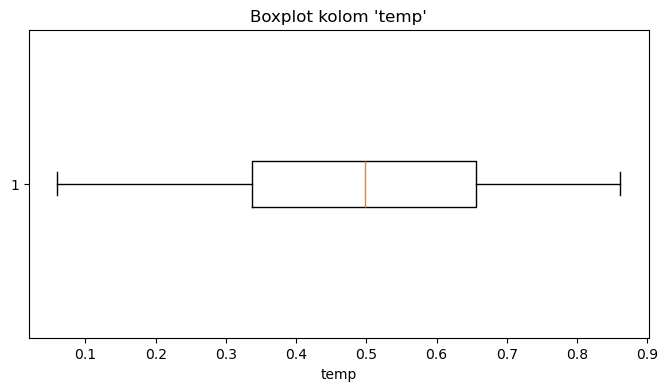

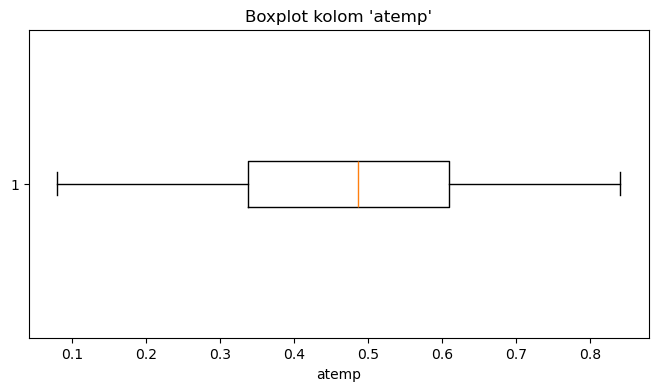

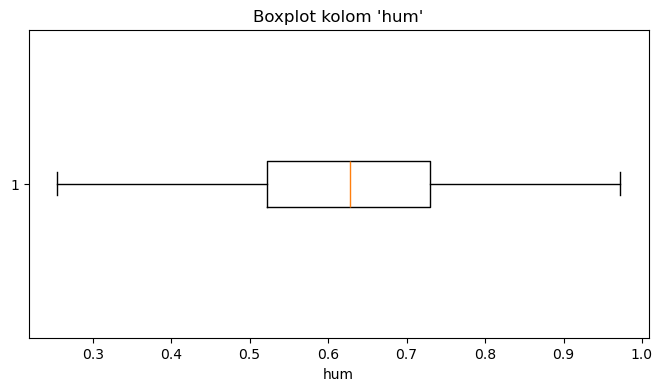

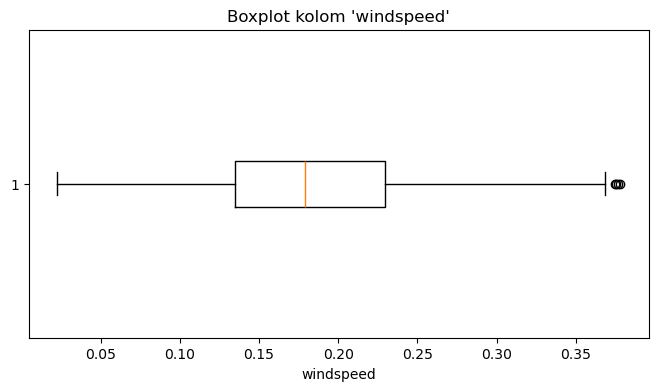

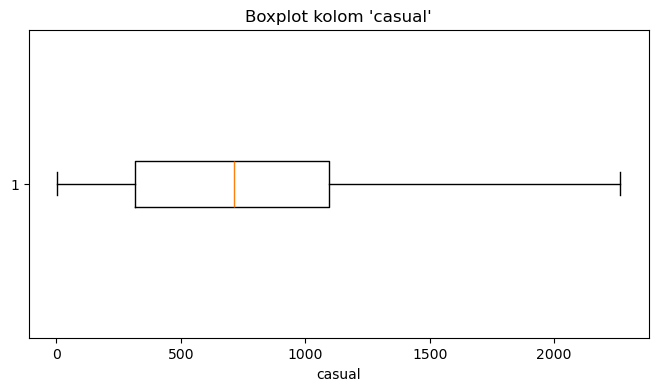

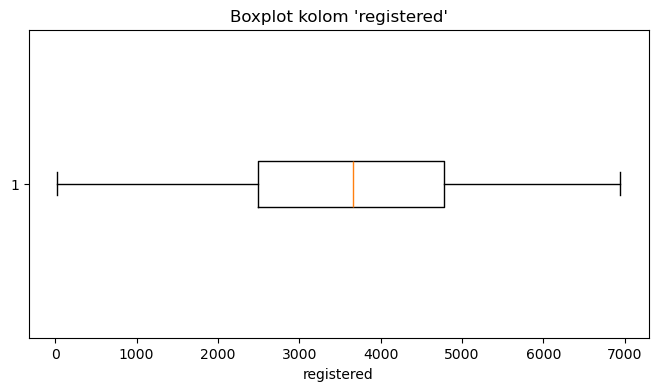

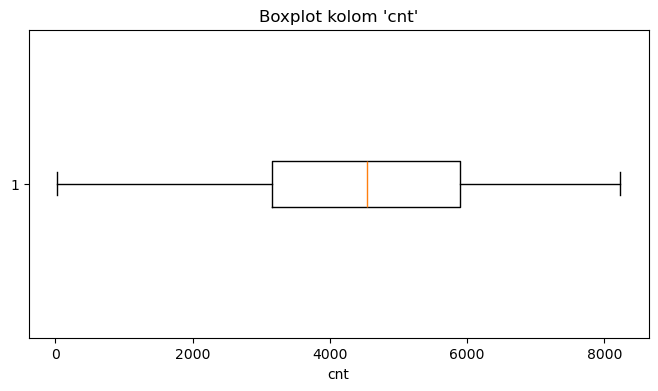

In [156]:
outlier_results_after = detect_numeric_outliers(day_df)

***melakukan imputasi terhadap kolom windspeed dengan metode IQR karena masih terdeteksi outlier***

In [158]:
q25 = day_df['windspeed'].quantile(0.25)
q75 = day_df['windspeed'].quantile(0.75)
iqr = q75 - q25
minimal = q25 - 1.5 * iqr
maximal = q75 + 1.5 * iqr

median_val = day_df.loc[(day_df['windspeed'] >= minimal) & (day_df['windspeed'] <= maximal), 'windspeed'].median()
day_df['windspeed'] = day_df['windspeed'].apply(lambda x: median_val if x < minimal or x > maximal else x)

***menampilkan hasil lagi setelah melakukan imputasi terhadap kolom windspeed dengan metode IQR menggunakan fungsi mencari outlier***

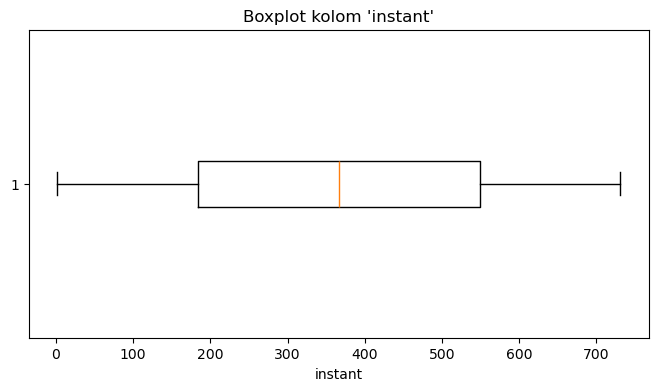

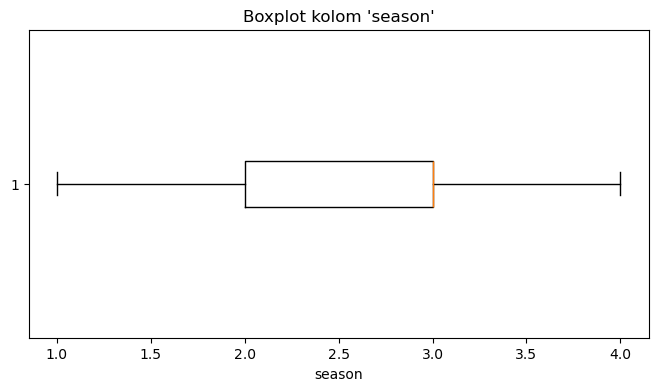

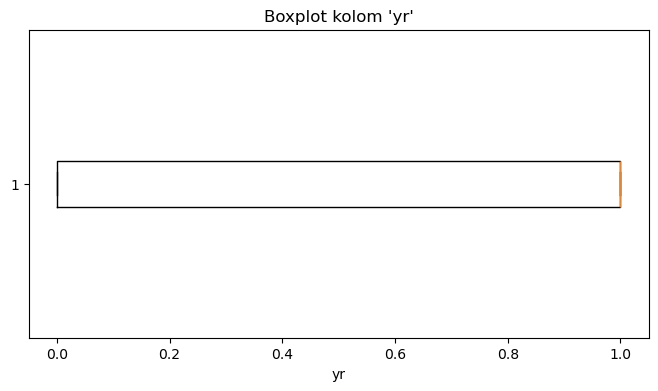

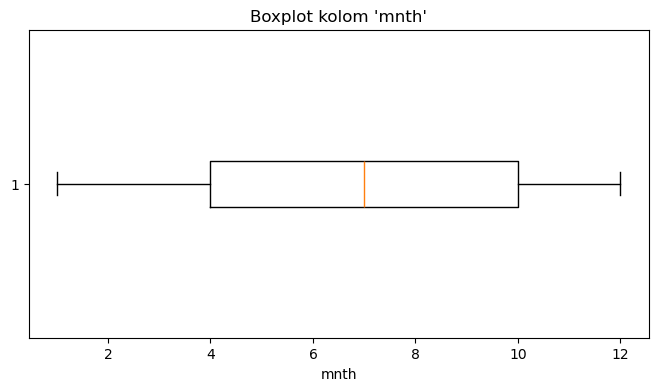

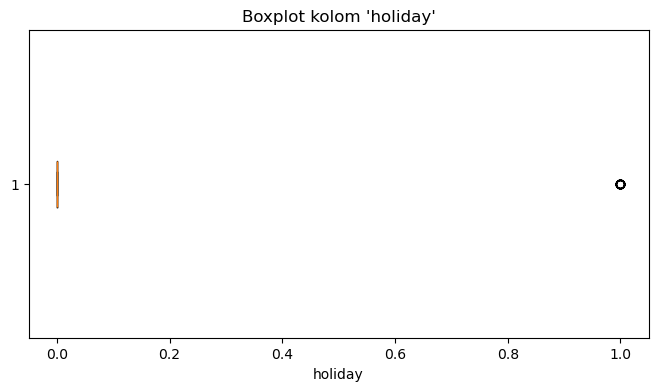

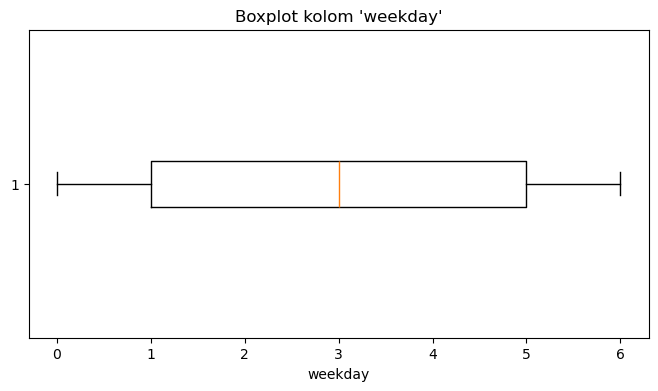

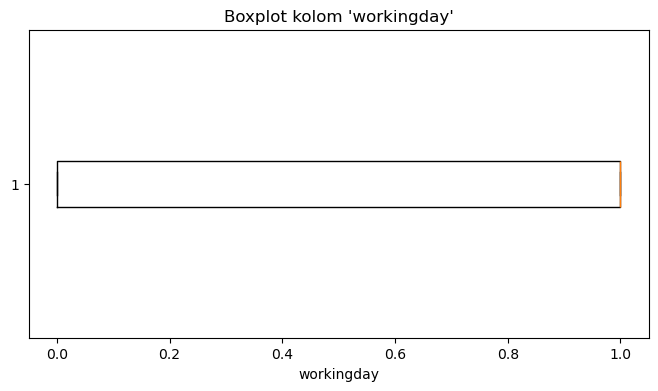

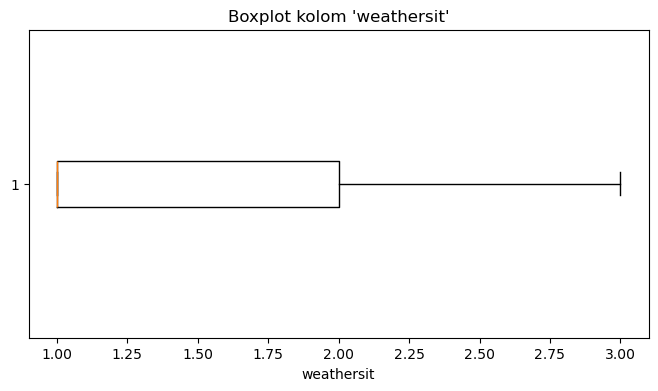

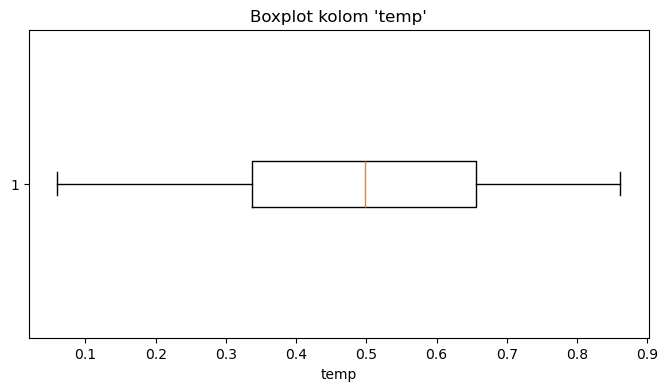

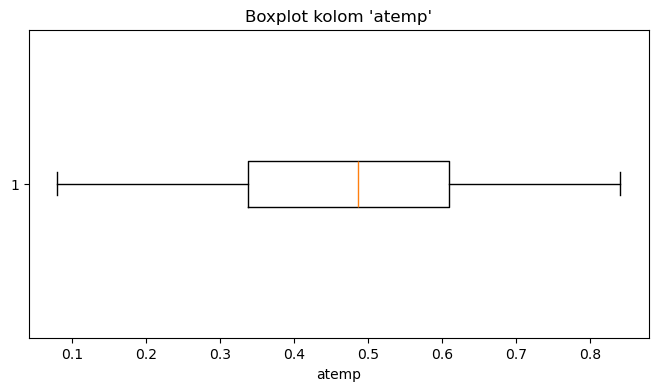

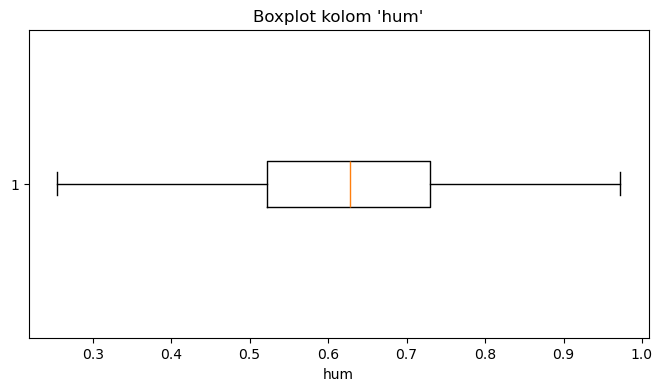

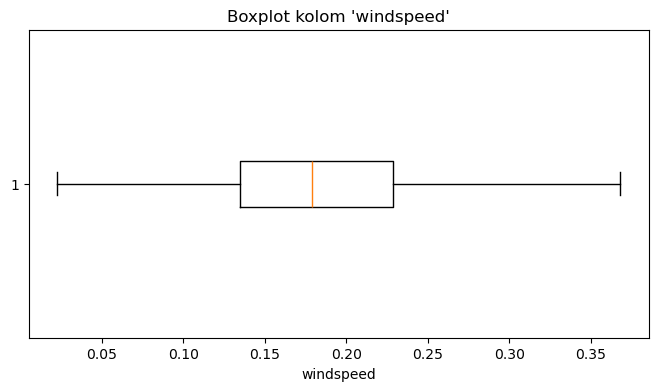

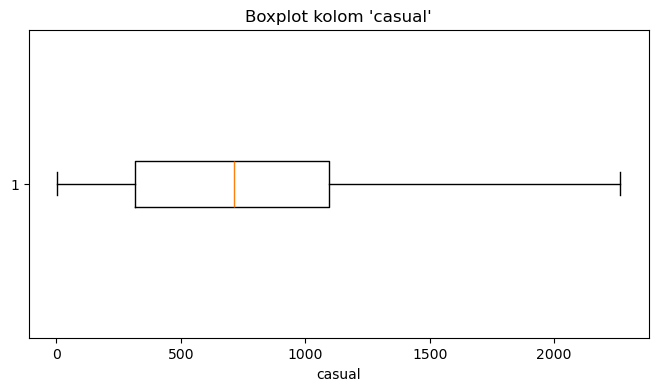

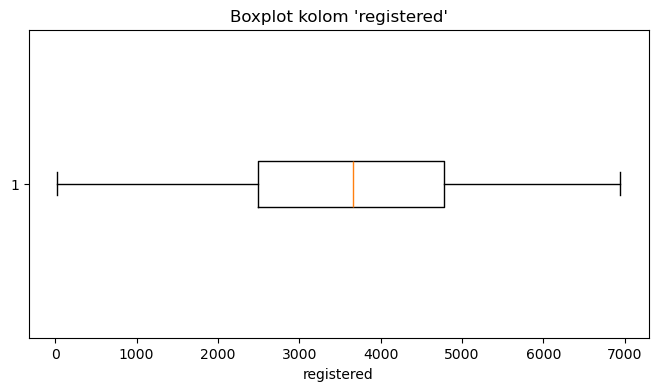

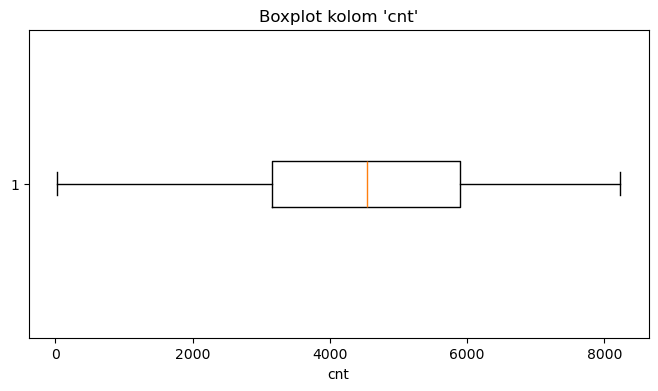

In [159]:
outlier_results_after2 = detect_numeric_outliers(day_df)

***mengubah tipe data "dteday" dari object menjadi datetime***

In [168]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

***menyimpan dataset menjadi csv baru dengan nama all_data***

In [170]:
day_df.to_csv('all_data.csv', index=False)

**Insight:**
- Dalam tahap ini. value yang terdeteksi adanya outlier diubah dengan IQR
- Dikarenakan data yg terdeteksi outlier ada pada casual namun tidak ada pada registered, maka dilakukan penyesuaian terhadap cnt agar data tidak menjadi rusak
- Setelah 1 kali imputasi dengan IQR, data secara keseluruhan sudah bersih, namun dalam kolom windspeed masih terdeteksi outlier sehingga dilakukan lagi imputasi untuk windspeed dan didapat semua outlier sudah hilang.
- Data disimpan sebagai csv baru untuk proses selanjutnya

## Exploratory Data Analysis (EDA)

***memanggil dataset yang baru dibuat***

In [199]:
day_df_new = pd.read_csv("data/all_data.csv", parse_dates=["dteday"])

### Explore day_df_new

***menampilkan informasi dataset terbaru***

In [200]:
day_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

***menampilkan sample dari dataset***

In [201]:
day_df_new.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
600,601,2012-08-23,3,1,8,0,4,1,1,0.695833,0.637008,0.635833,0.084596,1363,6402,7765
517,518,2012-06-01,2,1,6,0,5,1,2,0.654167,0.607962,0.755417,0.237563,533,3594,4127
643,644,2012-10-05,4,1,10,0,5,1,1,0.615000,0.580187,0.627500,0.106350,1516,6640,8156
575,576,2012-07-29,3,1,7,0,0,0,1,0.721667,0.667933,0.623750,0.170396,2153,4444,6597
123,124,2011-05-04,2,0,5,0,3,1,2,0.414167,0.404650,0.737083,0.328996,255,2378,2633


***menampilkan informasi nilai statistik dari dataset terbaru***

In [202]:
day_df_new.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.629354,0.185176,824.343365,3656.172367,4480.515732
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.522291,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.178802,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.228858,1096.000000,4776.500000,5893.500000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.368167,2266.000000,6946.000000,8232.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.139566,0.069746,623.538421,1560.256377,1905.412709


***mencari apakah kolom dteday itu unique atau tidak***

In [203]:
day_df_new.dteday.is_unique

True

***mencari apakah ada data duplicate pada dataset baru***

In [204]:
day_df_new.dteday.duplicated

<bound method Series.duplicated of 0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]>

***mengubah value beberapa kolom di dataset yang hanya berisi angka sesuai dengan ketentuan di dataset pertama***

In [205]:
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
year_map = {0: "2011", 1: "2012"}
month_map = {
    1: "January", 
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "Desember",}
holiday_map = {0: "Not Holiday", 1:"Holiday"}
weekday_map = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
workingday_map = {0: "Non-Working Day", 1: "Working Day"}
weathersit_map = {
    1: "Clear/Few clouds/Partly cloudy",
    2: "Mist/Cloudy/Broken clouds/Few clouds",
    3: "Light Snow/Light Rain/Thunderstorm/Scattered clouds",
    4: "Heavy Rain/Ice Pellets/Thunderstorm/Mist/Snow/Fog"
}

day_df_new["season"] = day_df_new["season"].map(season_map)
day_df_new["yr"] = day_df_new["yr"].map(year_map)
day_df_new["mnth"] = day_df_new["mnth"].map(month_map)
day_df_new["holiday"] = day_df_new["holiday"].map(holiday_map)
day_df_new["weekday"] = day_df_new["weekday"].map(weekday_map)
day_df_new["workingday"] = day_df_new["workingday"].map(workingday_map)
day_df_new["weathersit"] = day_df_new["weathersit"].map(weathersit_map)

***mengubah nama kolom seusai keinginan***

In [206]:
day_df_new.rename(columns={
    "season": "Season",
    "yr": "Year",
    "mnth": "Month",
    "weekday": "Weekday",
    "workingday": "Working Day",
    "weathersit": "Weather Situation",
    "cnt" : "Total"
}, inplace=True)


***menyimpan dataset menjadi file csv baru***

In [207]:
day_df_new.to_csv('main_data.csv', index=False)

**Insight:**
- Pada tahap EDA, dataset baru diload dan dilakukan eksplorasi data untuk mencari apakah ada data duplikat lagi atau tidak, ada data unique atau tidak, dll
- Pada tahap ini juga, beberapa kolom di rename dan diberi value sesuai dengan yang ada pada readme text dataset

## Visualization & Explanatory Analysis

***memanggil dataset terbaru***

In [209]:
main_data = pd.read_csv("dashboard/main_data.csv", parse_dates=["dteday"])

### Pertanyaan 1: Jumlah Penyewa sepeda tertinggi pada hari libur khusus

***menampilkan sample dari dataset baru***

In [211]:
main_data.sample(5)

,instant,dteday,Season,Year,Month,holiday,Weekday,Working Day,Weather Situation,temp,atemp,hum,windspeed,casual,registered,Total
144,145,2011-05-25,Summer,2011,May,Not Holiday,Wednesday,Working Day,Clear/Few clouds/Partly cloudy,0.660833,0.615542,0.696250,0.154233,740,4238,4978
125,126,2011-05-06,Summer,2011,May,Not Holiday,Friday,Working Day,Clear/Few clouds/Partly cloudy,0.479167,0.474117,0.590000,0.228246,894,3714,4608
421,422,2012-02-26,Spring,2012,February,Not Holiday,Sunday,Non-Working Day,Clear/Few clouds/Partly cloudy,0.279167,0.268308,0.410000,0.205229,515,2874,3389
312,313,2011-11-09,Winter,2011,November,Not Holiday,Wednesday,Working Day,Clear/Few clouds/Partly cloudy,0.400000,0.409079,0.758333,0.062196,305,3804,4109
139,140,2011-05-20,Summer,2011,May,Not Holiday,Friday,Working Day,Clear/Few clouds/Partly cloudy,0.536667,0.529042,0.719583,0.125013,909,4008,4917


***mencari jumlah penyewa pada hari libur khusus (holiday)***

In [241]:
df_holiday = main_data[main_data['holiday'] == 'Holiday'].copy()
df_holiday['dteday'] = df_holiday['dteday'].dt.strftime("%Y-%m-%d")
df_holiday_count = df_holiday[['dteday', 'Total']].reset_index(drop=True)
df_holiday_count

,dteday,Total
0,2011-01-17,1000
1,2011-02-21,1107
2,2011-04-15,3126
3,2011-05-30,4098
4,2011-07-04,5244
5,2011-09-05,3351
6,2011-10-10,5117
7,2011-11-11,3368
8,2011-11-24,1495
9,2011-12-26,1317


***menampilkan visualisasi***

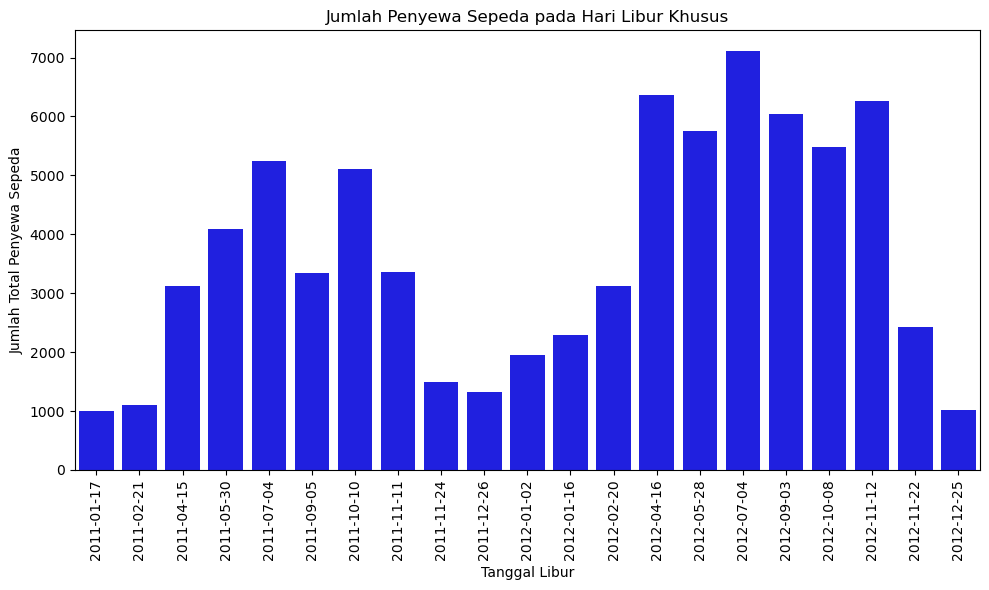

In [242]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_holiday['dteday'], y=df_holiday['Total'], color='blue')

plt.xticks(rotation=90)
plt.xlabel("Tanggal Libur")
plt.ylabel("Jumlah Total Penyewa Sepeda")
plt.title("Jumlah Penyewa Sepeda pada Hari Libur Khusus")
plt.tight_layout()

plt.show()

### Pertanyaan 2: Perbandingan antara penyewa casual dan registered?

***menampilkan sample dari dataset baru***

In [218]:
main_data.sample(5)

,instant,dteday,Season,Year,Month,holiday,Weekday,Working Day,Weather Situation,temp,atemp,hum,windspeed,casual,registered,Total
562,563,2012-07-16,Fall,2012,July,Not Holiday,Monday,Working Day,Clear/Few clouds/Partly cloudy,0.763333,0.724125,0.645000,0.164187,1088,5742,6830
678,679,2012-11-09,Winter,2012,November,Not Holiday,Friday,Working Day,Clear/Few clouds/Partly cloudy,0.361667,0.355413,0.540833,0.214558,709,5283,5992
490,491,2012-05-05,Summer,2012,May,Not Holiday,Saturday,Non-Working Day,Mist/Cloudy/Broken clouds/Few clouds,0.621667,0.584608,0.756667,0.152992,2266,4387,6653
245,246,2011-09-03,Fall,2011,September,Not Holiday,Saturday,Non-Working Day,Clear/Few clouds/Partly cloudy,0.669167,0.633213,0.716667,0.185325,1935,2549,4484
3,4,2011-01-04,Spring,2011,January,Not Holiday,Tuesday,Working Day,Clear/Few clouds/Partly cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562


***mencari data penyewa yang casual dan registered***

In [219]:
main_data_category_summary = pd.DataFrame({
    "Kategori": ["Casual", "Registered"],
    "Jumlah": [main_data["casual"].sum(), main_data["registered"].sum()]
})

In [221]:
main_data_category_summary

,Kategori,Jumlah
0,Casual,602595
1,Registered,2672662


***menampilkan visualisasi***

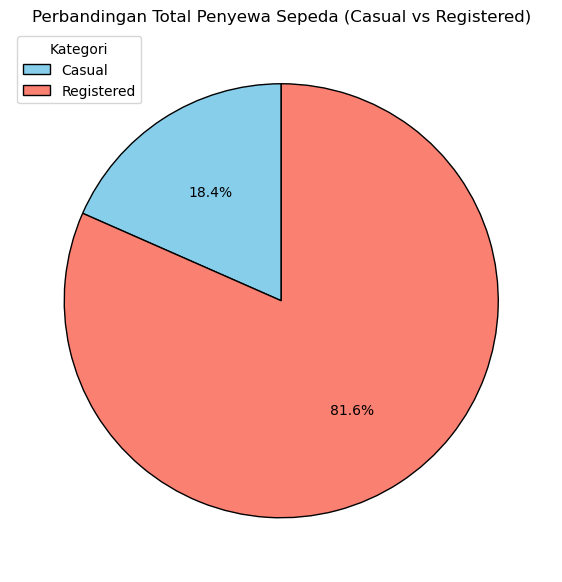

In [233]:
plt.figure(figsize=(7, 10))
wedges, texts, autotexts = plt.pie(main_data_category_summary["Jumlah"], autopct='%1.1f%%', 
        colors=["skyblue", "salmon"], startangle=90, wedgeprops={"edgecolor": "black"})

plt.legend(wedges, main_data_category_summary["Kategori"], title="Kategori", loc="upper left")

plt.title("Perbandingan Total Penyewa Sepeda (Casual vs Registered)")
plt.show()

**Insight:**
- pada tahap ini memvisualisasikan data sesuai dengan pertanyaan bisnis yang sudah dibuat
- Pertanyaan 1 mencari dan menampilkan jumlah penyewa pada hari libur khusus. Data divisualisasikan dengan bar chart.
- Pertanyaan 2 mencari perbandingan berupa persentase penyewa yang masuk kategori casual dan juga yang masuk kategori registered. Data divisualisasikan dengan pie chart karena hanya 2 kategori dan juga data peminjam yang banyak.

## Analisis Lanjutan (Clustering)

***menampilkan analisis lanjutan dengan clustering  menggunakan binning***

In [234]:
binning_cluster = [main_data["Total"].min(), main_data["Total"].quantile(0.33), main_data["Total"].quantile(0.66), main_data["Total"].max()]
labels = ["Rendah", "Sedang", "Tinggi"]

main_data["Klaster"] = pd.cut(main_data["Total"], bins=binning_cluster, labels=labels, include_lowest=True)

cluster_summary = main_data["Klaster"].value_counts().reset_index()
cluster_summary.columns = ["Kategori", "Jumlah Data"]


***menampilkan visualisasi***

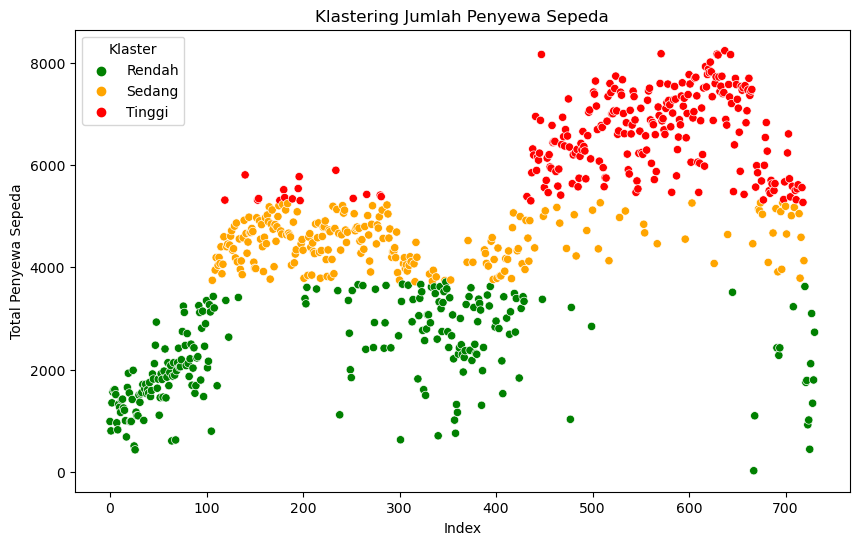

In [240]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=main_data.index, y=main_data["Total"], hue=main_data["Klaster"], style=main_data["Klaster"], markers={"Rendah": "o", "Sedang": "o", "Tinggi": "o"}, palette={"Rendah": "green", "Sedang": "orange", "Tinggi": "red"})

plt.xlabel("Index")
plt.ylabel("Total Penyewa Sepeda")
plt.title("Klastering Jumlah Penyewa Sepeda")
plt.legend(title="Klaster")
plt.show()

## Conclusion

- Conclution Pertanyaan 1 : 
Dari hasil diatas, jumlah penyewa terbanyak pada hari libur khusus terdapat pada tanggal 4 Juli 2012 dengan total penyewa 7107
- Conclution pertanyaan 2 : Dari hasil diatas, perbandingan antara penyewa casual dan registered adalah 18.4% casual dan 81.6% registered, sehingga dapat diambil kesimpulan bahwa penyewa registered > penyewa casual 